[-32 -32 -29 ...  -3  -1   4]
Figure(1296x576)


NameError: name 'Image' is not defined

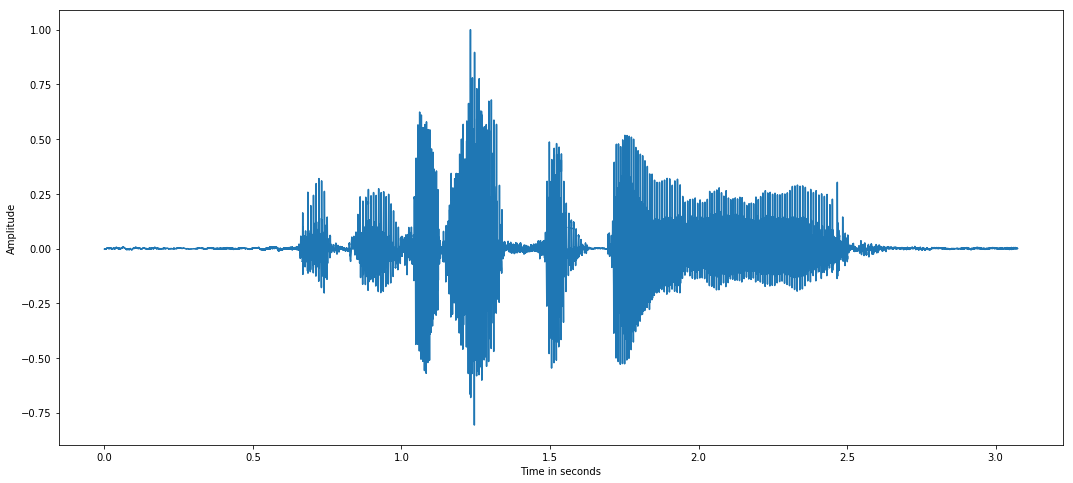

<Figure size 1296x576 with 0 Axes>

In [8]:
import numpy as np
import matplotlib.pyplot as plt

data = np.memmap("KsponSpeech_000001.pcm", dtype='h', mode='r')
samp_freq = 16*1024


print(data)

#pylab.plot(data)
#pylab.show()

# Normilze to max amplitude of 1.

speech_samples_norm = data/np.max(data)

strt_samp = 0
end_samp = len(speech_samples_norm)
end_ms = len(speech_samples_norm)/samp_freq

xrange = np.linspace(0, end_ms, end_samp-strt_samp)

# Plot speech and the corresponding spectrogram
fg1 = plt.figure(figsize=(18, 8))
plt.plot(xrange, speech_samples_norm)
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')
plt.axis('tight')

fg1.savefig('speech1.jpg')

winlen = int(samp_freq*.03)  # Window size of 30 ms
specX = librosa.stft(speech_samples_norm, win_length=winlen)
Xdb = librosa.amplitude_to_db(abs(specX))
fg2 = plt.figure(figsize=(18, 8))

fg2.savefig('specgram.jpg')

print(fg2)

# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
drop_out = 0.7
hidden_dim = 1024 #cell의 수
seq_length = 10
word_size = 1 #단어길이

im = Image.open('specgram.jpg')